In [63]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import matplotlib.pyplot as plt

In [29]:
data_path = 'ml100/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test =  pd.read_csv(data_path + 'test_features.csv')
LEncoder = LabelEncoder()
df_train['poi'] = LEncoder.fit_transform(df_train['poi'])


## 資料清洗數據前處裡

In [30]:
train_Y = np.log1p(df_train['poi'])
ids = df_test['name']
df_train = df_train.drop(['name', 'email_address'] , axis=1)
df_test = df_test.drop(['name', 'email_address'] , axis=1)
#df = pd.concat([df_train,df_test])
#df = df.drop(['email_address'], axis = 1)
#df.info()

### Check for Outlier (Day 9)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([40., 13.,  2.,  2.,  0.,  1.,  1.,  0.,  1.,  1.]), array([  70000.,  863000., 1656000., 2449000., 3242000., 4035000.,
       4828000., 5621000., 6414000., 7207000., 8000000.]), <a list of 10 Patch objects>)
(array([15.,  2.,  3.,  2.,  2.,  0.,  1.,  1.,  0.,  2.]), array([-102500. ,  204200.6,  510901.2,  817601.8, 1124302.4, 1431003. ,
       1737703.6, 2044404.2, 2351104.8, 2657805.4, 2964506. ]), <a list of 10 Patch objects>)
(array([ 1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  5., 23.]), array([-3.5043860e+06, -3.1540516e+06, -2.8037172e+06, -2.4533828e+06,
       -2.1030484e+06, -1.7527140e+06, -1.4023796e+06, -1.0520452e+06,
       -7.0171080e+05, -3.5137640e+05, -1.0420000e+03]), <a list of 10 Patch objects>)
(array([1., 1., 1., 0., 0., 0., 0., 0., 7., 3.]), array([  3285. ,  15459.9,  27634.8,  39809.7,  51984.6,  64159.5,
        76334.4,  88509.3, 100684.2, 112859.1, 125034. ]), <a list of 10 Patch objects>)
(array([65.,  8.,  3.,  0.,  1.,  2.,  0.,  0.,  1.,  1.]), ar

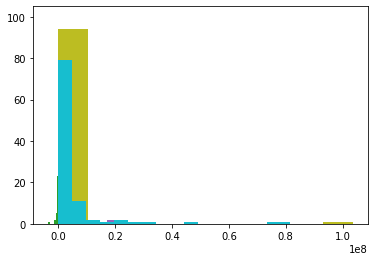

In [31]:
for c in df_train.columns:
    print(plt.hist(df_train[c]))
for c in df_train.columns:
    print(df_train[c].value_counts())

## 資料特徵工程技術

In [32]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
#df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      113 non-null    float64
 1   deferral_payments          113 non-null    float64
 2   deferred_income            113 non-null    float64
 3   director_fees              113 non-null    float64
 4   exercised_stock_options    113 non-null    float64
 5   expenses                   113 non-null    float64
 6   from_messages              113 non-null    float64
 7   from_poi_to_this_person    113 non-null    float64
 8   from_this_person_to_poi    113 non-null    float64
 9   loan_advances              113 non-null    float64
 10  long_term_incentive        113 non-null    float64
 11  other                      113 non-null    float64
 12  poi                        113 non-null    int64  
 13  restricted_stock           113 non-null    float64

### Feature Selection

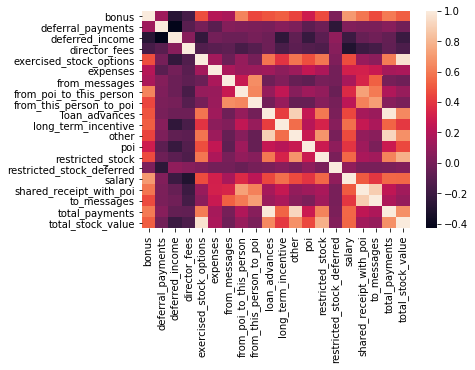

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_train.corr()
sns.heatmap(corr)
plt.show()

In [34]:
high_list = list(corr[(corr['poi']>0.1) | (corr['poi']<-0.1)].index)
high_list.remove('poi')
print(len(high_list))

14


In [35]:
df_train = df_train.drop(['poi'], axis = 1)
df = pd.concat([df_train,df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      146 non-null    float64
 1   deferral_payments          146 non-null    float64
 2   deferred_income            146 non-null    float64
 3   director_fees              146 non-null    float64
 4   exercised_stock_options    146 non-null    float64
 5   expenses                   146 non-null    float64
 6   from_messages              146 non-null    float64
 7   from_poi_to_this_person    146 non-null    float64
 8   from_this_person_to_poi    146 non-null    float64
 9   loan_advances              146 non-null    float64
 10  long_term_incentive        146 non-null    float64
 11  other                      146 non-null    float64
 12  restricted_stock           146 non-null    float64
 13  restricted_stock_deferred  146 non-null    float64


In [61]:
df_mm = MMEncoder.fit_transform(df[high_list])
train_X = df_mm[:train_num]
estimator = GradientBoostingRegressor()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

-0.2599999999999999

In [69]:
rf = RandomForestRegressor(n_estimators=300, min_samples_split=9, min_samples_leaf=10, 
                           max_features='sqrt', max_depth=8, bootstrap=False)
rf.fit(df_mm[:train_num], train_Y)
rf_pred = rf.predict(df_mm[train_num:])
rf_pred
#sub = pd.DataFrame({'name': ids, 'poi': np.expm1(rf_pred)})
#sub.to_csv('kaggle_submission.csv', index=False)
#sub

,name,poi
0,BELDEN TIMOTHY N,0.240752
1,BOWEN JR RAYMOND M,0.175433
2,HANNON KEVIN P,0.305996
3,DELAINEY DAVID W,0.184552
4,CAUSEY RICHARD A,0.280165
5,HICKERSON GARY J,0.196632
6,FREVERT MARK A,0.387378
7,CHAN RONNIE,0.005464
8,DONAHUE JR JEFFREY M,0.074891
9,REYNOLDS LAWRENCE,0.077299


In [74]:
estimator.fit(df_mm[:train_num], train_Y)
pred = estimator.predict(df_mm[train_num:])
pred = pd.DataFrame(pred)
pred = MMEncoder.fit_transform(pred)

my_list = map(lambda x: x[0], pred)
ser = pd.Series(my_list)

blending_pred = ser*0.4597 + rf_pred*0.5403
#sub = pd.DataFrame({'Id': ids, 'SalePrice': np.expm1(blending_pred)})
#sub.to_csv('house_blending.csv', index=False)

sub = pd.DataFrame({'name': ids, 'poi': np.expm1(blending_pred)})
sub.to_csv('kaggle_submission.csv', index=False) 
sub


,name,poi
0,BELDEN TIMOTHY N,0.195710
1,BOWEN JR RAYMOND M,0.534042
2,HANNON KEVIN P,0.369934
3,DELAINEY DAVID W,0.103818
4,CAUSEY RICHARD A,0.179157
5,HICKERSON GARY J,0.741267
6,FREVERT MARK A,0.483202
7,CHAN RONNIE,0.062158
8,DONAHUE JR JEFFREY M,0.051489
9,REYNOLDS LAWRENCE,0.041697


## 機器學習基礎模型

## 機器學習調整參數

•如何處理理存在各種缺陷的真實資料
•使⽤用 val / test data 來來了了解機器學習模型的訓練情形
•使⽤用適當的評估函數了了解預測結果
•應⽤用適當的特徵⼯工程提升模型的準確率
•調整機器學習模型的超參參數來來提升準確率
•清楚的說明⽂文件讓別⼈人了了解你的成果


In [27]:
pred

array([ 9.72014457e-02,  5.90051441e-01,  2.83826733e-01,  3.68595452e-03,
        4.74534447e-02,  7.52570028e-01,  2.11614420e-01,  9.12542116e-02,
        3.60840745e-02, -6.88323162e-03,  1.94402811e-02, -1.52387970e-03,
       -2.34979167e-03, -4.25734913e-03,  4.47001081e-01, -1.53308019e-03,
        1.63559549e-02,  1.29136597e-01,  2.34089670e-01, -1.52387970e-03,
        7.29604256e-01,  5.60371520e-02,  4.01682383e-03,  1.09325123e-02,
       -1.42340921e-03,  1.82274055e-02, -9.86859795e-03,  6.87765833e-04,
        1.12416134e-01,  1.16085546e-01, -4.97622887e-03, -6.89929772e-03,
        2.00551472e-01])